# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_$####.ipynb' (filled in with your unique course ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted assignment.
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!
- Each coding question in this assignment only requires a small amount of code, about 1-3 lines. 
    - If you find yourself writing much more than that, you might want to reconsider your approach. 
    - A reminder that the Tutorials notebooks often contain similar examples to those used in the assignments.
- This assignment also has some written answers, in which you will write a short response (in text, not code). 
    - These questions are referred to as 'W#', and will be followed by a markdown cell in which you can write your answer. 
    - These are short answer questions, prompting you to think about the approaches we are using. 
    - You answers can and should be fairly brief, typically about 1-2 sentences.

In [2]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Data Wrangling

For this assignment, you are provided with two data files:
- age_steps.csv
- name_income_id.json

In [3]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.

# YOUR CODE HERE
df_steps = pd.read_csv("age_steps.csv")
print(df_steps)

         id  age  steps
0       125   41  17545
1       170   38  27851
2       193   49  16507
3       291   37  24488
4       315   46  10468
5       412   44  16895
6       480   32  15574
7       689   49  18892
8       704   67  14127
9       967   53  24145
10      992   72   8829
11     1095   50  15676
12     1252   55  14602
13     1335   50   9444
14     1467   72     -1
15     1527   59   8086
16     1545   36  18504
17     1567   68  19049
18     1666   59  18463
19     1797   56  17193
20     1849   73  10113
21     2000   56  15299
22     2349   56  23411
23     2373   38  18557
24     2481   59  13144
25     2521   55  13061
26     2588   80   8746
27     2652   51  14076
28     2754   51  14893
29     2762   56  17658
...     ...  ...    ...
1470  98425   36  15637
1471  98507   28  11558
1472  98599   48  14382
1473  98683   63  15848
1474  98705   49  14070
1475  98735   77  21519
1476  98873   45  18349
1477  98898   43  13283
1478  98918   53  12337
1479  98963   55

In [4]:
# Tests for 1a

assert isinstance(df_steps, pd.DataFrame)


In [5]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.

# YOUR CODE HERE

df_income = pd.read_json("name_income_id.json")
print(df_income)


       first_name     id     income  last_name
0           David  41008   35081.75     Acosta
1       Stephanie  80974   21240.47      Adams
2     Christopher  49639   18789.55      Adams
3         Tiffany  86949   23302.03      Adams
4        Patricia  76586    9862.30      Adams
5           Brian  85016   27092.51      Adams
6           Billy  40864   18229.02      Adams
7           Tammy  46642   21814.85     Adkins
8          Nathan  28875    9967.79    Aguilar
9       Christian  23792   15443.25    Aguirre
10       Kimberly  14036   12523.10  Alexander
11    Christopher  42479   51972.76      Allen
12           Lynn  12669    6716.17      Allen
13         Edward  30193    5803.22      Allen
14      Christina  58683   59941.80    Allison
15           Eric  94150   20318.97    Alvarez
16          Isaac  93229    4480.07    Alvarez
17         Robert  46993    1069.19    Alvarez
18          Jason  45211   14430.17    Alvarez
19       Jennifer   6429    8158.18   Andersen
20        Jef

In [6]:
# Tests for 1b

assert isinstance(df_income, pd.DataFrame)


In [7]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.

# YOUR CODE HERE

df_income = df_income.drop(['first_name','last_name'], axis = 1)

In [8]:
# Tests for 1c

assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [9]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Both dataframes should have a column called 'id' use this column to align the datasets (merge on 'id')
#  Note: For this part, it doesn't in which order you merge the dataframes.

# YOUR CODE HERE
df = pd.merge(df_steps, df_income,on ='id')
print(df)


         id  age  steps     income
0       125   41  17545   14275.46
1       170   38  27851   18030.66
2       193   49  16507   11246.64
3       291   37  24488    5395.10
4       315   46  10468    4834.24
5       412   44  16895    4044.98
6       480   32  15574   10035.88
7       689   49  18892   10607.42
8       704   67  14127   16616.84
9       967   53  24145   22101.16
10      992   72   8829   22748.16
11     1095   50  15676   11390.07
12     1252   55  14602   20003.66
13     1335   50   9444    5714.88
14     1467   72     -1  115055.17
15     1527   59   8086       0.00
16     1545   36  18504   12359.43
17     1567   68  19049   24973.75
18     1666   59  18463   81222.63
19     1797   56  17193   21539.84
20     1849   73  10113   39628.83
21     2000   56  15299   17127.65
22     2349   56  23411   40028.32
23     2373   38  18557       0.00
24     2481   59  13144   29205.16
25     2521   55  13061  101819.97
26     2588   80   8746   73068.97
27     2652   51  14

In [10]:
# Tests for 1d

assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [11]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]

# YOUR CODE HERE
df = df.sort_values(by =['id','age', 'steps', 'income'])
print(df)

         id  age  steps     income
0       125   41  17545   14275.46
1       170   38  27851   18030.66
2       193   49  16507   11246.64
3       291   37  24488    5395.10
4       315   46  10468    4834.24
5       412   44  16895    4044.98
6       480   32  15574   10035.88
7       689   49  18892   10607.42
8       704   67  14127   16616.84
9       967   53  24145   22101.16
10      992   72   8829   22748.16
11     1095   50  15676   11390.07
12     1252   55  14602   20003.66
13     1335   50   9444    5714.88
14     1467   72     -1  115055.17
15     1527   59   8086       0.00
16     1545   36  18504   12359.43
17     1567   68  19049   24973.75
18     1666   59  18463   81222.63
19     1797   56  17193   21539.84
20     1849   73  10113   39628.83
21     2000   56  15299   17127.65
22     2349   56  23411   40028.32
23     2373   38  18557       0.00
24     2481   59  13144   29205.16
25     2521   55  13061  101819.97
26     2588   80   8746   73068.97
27     2652   51  14

In [12]:
# Tests for 1e

assert list(df.columns) == ['id', 'age', 'steps', 'income']

In [13]:
# 1f) Make two different copies of 'df'. 
# Call the first one 'df2', and the second one 'df3'.
# Note: Simply writing 'df2 = df' and 'df3 = df' will NOT work!
#   A quick google search reveals how to properly copy dataframes.

# YOUR CODE HERE
df2 = df.copy()
df3 = df.copy()


In [14]:
# Tests for 1f

assert(df2 is not df)
assert(df3 is not df)

## Part 2 - Data Cleaning

Before analysis, data must be cleaned of missing or unusable data. 

Now that the datasets are joined into a single dataframe, the next steps are to remove or replace any bad data before moving onto any analyses. 

In [15]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

# YOUR CODE HERE
n_nan = df.isnull().sum().sum()
print(n_nan)

17


In [16]:
# Tests for 2a

assert(n_nan)


In [17]:
# 2b) Remove all rows from df that have missing data. 
#  In other words, remove all rows wth NaN values.

# YOUR CODE HERE

df = df.dropna()

In [18]:
# Tests for 2b

assert sum(np.isnan(df['income'])) == 0

In [19]:
# 2c) Create a variable called `mean_income` which holds the average income in df

# YOUR CODE HERE
mean_income = df['income'].mean()
print(mean_income)

27564.214243225393


In [20]:
# Tests for 2c

assert mean_income


In [21]:
# 2d) In df2, replace all missing values with `mean_income`
# YOUR CODE HERE
df2 = df2.fillna('mean_income')
print(df2)

         id  age  steps     income
0       125   41  17545   14275.46
1       170   38  27851   18030.66
2       193   49  16507   11246.64
3       291   37  24488    5395.10
4       315   46  10468    4834.24
5       412   44  16895    4044.98
6       480   32  15574   10035.88
7       689   49  18892   10607.42
8       704   67  14127   16616.84
9       967   53  24145   22101.16
10      992   72   8829   22748.16
11     1095   50  15676   11390.07
12     1252   55  14602   20003.66
13     1335   50   9444    5714.88
14     1467   72     -1  115055.17
15     1527   59   8086       0.00
16     1545   36  18504   12359.43
17     1567   68  19049   24973.75
18     1666   59  18463   81222.63
19     1797   56  17193   21539.84
20     1849   73  10113   39628.83
21     2000   56  15299   17127.65
22     2349   56  23411   40028.32
23     2373   38  18557       0.00
24     2481   59  13144   29205.16
25     2521   55  13061  101819.97
26     2588   80   8746   73068.97
27     2652   51  14

In [21]:
# Tests for 2d

assert not df2['income'].hasnans


### W1 - Missing Data

You just used two different approaches for dealing with missing data: dropping the rows and replacing with the mean. 

For each approach, briefly describe below when you think it would be appropriate to use this approach. 

When is best to use one approach over the other?

YOUR ANSWER HERE: If the data is missing completely at random then it should keep the correlation in the data if you replace the missing with the mean. But, if there is too much missing data then the data will be influenced by the mean and you can't consider it viable anymore. The best approach would be to drop the data instead. 

## Part 3: Data Visualization

Here we will start exploring our data visually, using some plots. 

In particular, we will plot the distributions of each of our variables, in such a way as to let us get a sense of the data, and look for any problems. 

Pandas comes with some plotting capabilities. We will also be making histograms, which can be done with matplotlib.

Here's an example of making histograms: http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

This example has more than you need: 
- Titles, axis labels, etc are optional (but recommended)
- You do no need to add a 'best fit' line.

Notes:

- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

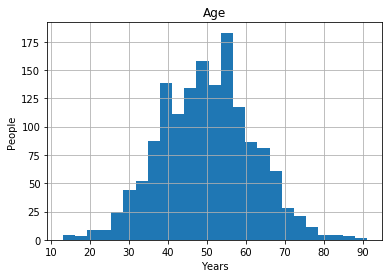

In [22]:
# 3a) Plot a histogram of the age variable

# YOUR CODE HERE
df['age'].hist(bins=25)
plt.title("Age")
plt.xlabel("Years")
plt.ylabel("People")
f1 = plt.gcf()

In [23]:
# Tests for 3a

assert f1.gca().has_data()

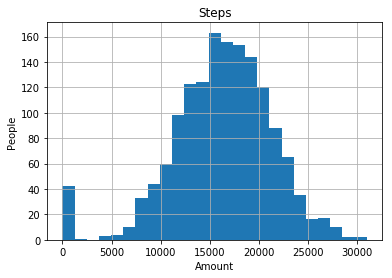

In [24]:
# 3b) Plot a histogram of the steps variable

# YOUR CODE HERE
df['steps'].hist(bins=25)
plt.title("Steps")
plt.xlabel("Amount")
plt.ylabel("People")
f2 = plt.gcf()

In [25]:
# Tests for 3b

assert f2.gca().has_data()

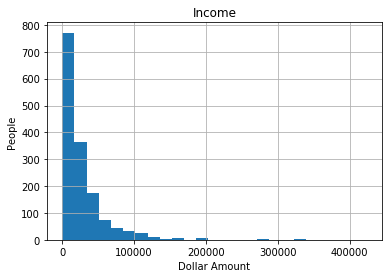

In [26]:
# 3c) Plot a histogram of the income variable

# YOUR CODE HERE
df['income'].hist(bins=25)
plt.title("Income")
plt.xlabel("Dollar Amount")
plt.ylabel("People")
f3 = plt.gcf()

In [27]:
# Tests for 3c

assert f2.gca().has_data()

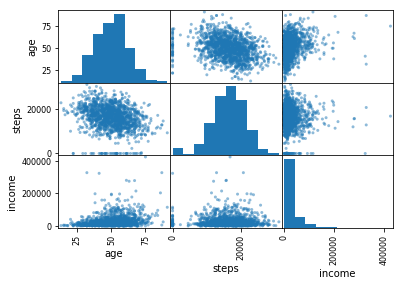

In [28]:
# 3d) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
#  Only plot the 'age', 'steps', and 'income' variables.

# YOUR CODE HERE
from pandas.tools.plotting import scatter_matrix
fd = pd.plotting.scatter_matrix(df[['age','steps','income']])

In [29]:
# Tests for 3d

assert len(fd[0]) == 3
assert np.all(ax.has_data() for ax in fd[0])

### W2 - What do you notice about data now that you've visualized it?

For each of 'steps', 'income' and 'age', write a quick comment on each of anything that you notice from the above visualizations, that may need to be addressed before moving onto data analysis. 

In particular:
- Are there outliers or bad values we need to fix? 
- Might we want to transform any of the distributions?

Answer Here: For 'steps' there are 40 people who took 0 total steps. In 'income' there are a small amount of people with 20,000, high 20,000's and lower 30,000 income ranges. While 10-20 and 90-100 years for 'age' could be considered outliers. We could transform the distribution to have a smaller range for the dollar amount of income in order to show a more concise form of data. 

## Part 4: Data Pre-Processing

In the above sections, we did some basic data cleaning, and visualization. 

In practice, these two components of an analysis pipeline are often combined into an iterative approach, going back and forth between looking at the data, checking for issues, and then cleaning the data. 

In this next section we will continue with an iterative procedure of data cleaning and visualization, addressing some issues that we can start to see when visualizing the data.

In [30]:
# 4a) Dealing with an impossible value in 'steps'. 
#  Check how many -1 values there are in steps. 
#  Save the number into a variable called 'n_neg'

# YOUR CODE HERE
n_neg = df.steps[df.steps == -1].sum()
n_neg = n_neg * -1
print(n_neg)

41


In [31]:
# Tests for 4a

assert(n_neg)


In [32]:
# 4b) Remove all rows where steps is equal to -1

# YOUR CODE HERE
df = df[df.steps != -1]
print(df)

         id  age  steps     income
0       125   41  17545   14275.46
1       170   38  27851   18030.66
2       193   49  16507   11246.64
3       291   37  24488    5395.10
4       315   46  10468    4834.24
5       412   44  16895    4044.98
6       480   32  15574   10035.88
7       689   49  18892   10607.42
8       704   67  14127   16616.84
9       967   53  24145   22101.16
10      992   72   8829   22748.16
11     1095   50  15676   11390.07
12     1252   55  14602   20003.66
13     1335   50   9444    5714.88
15     1527   59   8086       0.00
16     1545   36  18504   12359.43
17     1567   68  19049   24973.75
18     1666   59  18463   81222.63
19     1797   56  17193   21539.84
20     1849   73  10113   39628.83
21     2000   56  15299   17127.65
22     2349   56  23411   40028.32
23     2373   38  18557       0.00
24     2481   59  13144   29205.16
25     2521   55  13061  101819.97
26     2588   80   8746   73068.97
27     2652   51  14076    1654.15
28     2754   51  14

In [33]:
# Tests for 4b

assert sum(df['steps'] == -1) == 0

### W3 - Transforming Distributions

Once thing you might have noticed is that the income is not normally distributed. 

In the next steps, we will address this by log transforming the income data. First though, we will have to deal with any income values that are 0. Note that these values are not impossible values, but may, for example, reflect people who are unemployed. 

Why are are we log-transforming the data, and how does that help us? Why do we have to do something special with 0's?

Hint: calculate log10 of zero, and see what the answer is. 

YOUR ANSWER: Log10 of 0 is undefined. So, if we log transform the data we are able to transform all 0's to Nan data that we can then either input the mean or get rid of the rows of data easier. 

In [34]:
# 4c) For all rows in which income is equal to zero, recode income to be equal to 1

# YOUR CODE HERE
df.loc[df['income']== 0, 'income']= 1

In [35]:
# Tests for 4c

assert sum(df['income'] == 0.) == 0

In [36]:
# 4d) Transform income using a log10 transform

# YOUR CODE HERE
df['income']= np.log10(df.income)

In [37]:
# Tests for 4d

assert np.isclose(min(df['income']), 0.0, 0.05)
assert np.isclose(max(df['income']), 5.62, 0.05)

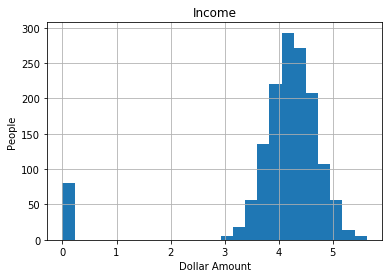

In [38]:
# 4e) Replot the histogram for income data after the data transformation

# YOUR CODE HERE
df['income'].hist(bins=25)
plt.title("Income")
plt.xlabel("Dollar Amount")
plt.ylabel("People")
f4 = plt.gcf()

In [39]:
# Tests for 4e

assert f4.gca().has_data()

In [40]:
# 4f) We might also have certain regulations or restrictions that we need to follow about the data. 
# Here, we will only analyze adults. Remove all rows where age is less than 18.

# YOUR CODE HERE
df = df[df.age > 18]

In [41]:
# Tests for 4f

assert min(df['age']) >= 18

## Part 5 Outliers

So far, we have dealt with the most clearly wrong or impossible data values. 

We might still might need to deal with more subtle outliers: values that seem abnormally high or low. These values may seem suspicious, and they may skew our analyses. 

In this step, we are going to deal with outlier values by removing all rows in which the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

Note that when you perform this kind of outlier removal can have large impacts. For example, the procedure we take here might give quite different results if we did it before removing the -1 values in steps. 

In [42]:
# 5a) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
#    Note: you must use pandas to calculate the standard devation!
#    Pandas & Numpy use slightly different conventions for std, so using numpy here will get a different value
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

# YOUR CODE HERE
dfstd = df['steps'].std()
std3 = dfstd * 3
mean_steps = df['steps'].mean()
std_max = std3 + mean_steps
std_min = std3 - mean_steps
print(std_max)
print(std_min)
print(std3)

30004.510777993084
-3347.314477979613
13328.598150006736


In [43]:
# Tests for 5a

assert(std3)
assert(std_min)
assert(std_max)


In [44]:
# 5b) Now use these values to remove any rows with steps data above or below these thresholds

# YOUR CODE HERE

df = df[df.steps < std_max]
df = df[df.steps > std_min]

In [45]:
# Tests for 5b

assert np.all(df['steps'])


In [46]:
# CHECK IN
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (1463, 4)

## Part 6 - Basic Analyses

Now that we have wrangled and cleaned our data, we can start doing some simple analyses. 

Here we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) between variables, and ask some simple questions about potentially interesting subsets of our data. 

In [47]:
# 6a) Descriptive summary
# Use the 'describe' pandas method to check a descriptive summary of the data
#   Save the dataframe generated by describe to a new variable called 'desc'

# YOUR CODE HERE
desc = df.describe()
print(desc)


                 id          age         steps       income
count   1463.000000  1463.000000   1463.000000  1463.000000
mean   51108.842789    50.120301  16656.931647     4.026726
std    28715.983572    11.660051   4416.074302     1.055706
min      125.000000    20.000000    383.000000     0.000000
25%    26986.500000    42.000000  13534.500000     3.903712
50%    50858.000000    50.000000  16716.000000     4.219474
75%    76504.500000    57.000000  19696.000000     4.529206
max    99946.000000    91.000000  29540.000000     5.627168


In [48]:
# Tests for 6a

assert isinstance(desc, pd.DataFrame)

In [49]:
# 6b) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas method. Keep all columns (including ID).
#  Assign the result (which should be a dataframe) to a variable called 'corrs'.

# YOUR CODE HERE
corrs = df.corr(method ='pearson', min_periods=1) 
print(corrs)

              id       age     steps    income
id      1.000000  0.028420  0.004255  0.046159
age     0.028420  1.000000 -0.314553  0.131931
steps   0.004255 -0.314553  1.000000  0.001947
income  0.046159  0.131931  0.001947  1.000000


In [50]:
# Tests for 6b

assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

In [51]:
# 6c) Checking correlations
# Answer the following questions by setting to answer variable to 'age', 'steps', or 'income'
# Which variable is most correlated with age? Set the answer in a variable called 'age_corr'. 
# Which variable is most correlated with income? Set the answer in a variable called 'inc_corr'. 

# YOUR CODE HERE
age_corr = 'income'
inc_corr = 'age'
print(age_corr)

income


In [52]:
# Tests for 6c

assert age_corr
assert inc_corr


In [53]:
# 6d) How many steps would you have to walk to be in the top 10% of walkers
#  Save you answer as a variable called 'top_walker'
#  Hint: check out the 'quantile' method.

# YOUR CODE HERE
top_walker = df['steps'].quantile(.90)
print(top_walker)

22274.0


In [54]:
# Tests for 6d

assert top_walker


In [55]:
# 6e) What is the average income for people over the age of 45?
# Save your response in a variable called 'old_income'.
# Note: for this response, keep the answer as the logged value (do no 'un-log' the answer).

# YOUR CODE Here
age_income = df[df.age > 45]
old_income = age_income['income'].mean()
print(old_income)




4.10550871391111


In [56]:
# Tests for 6e
assert old_income


# Part 7 - Predictions

A frequent goal of data analysis is to understand so that we can make predictions about future or unseen data points. 

Here we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.

Notes:
- Use the polyfit function from numpy, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions for income should be in dollars (so you'll have to 'un-log' the prediction)

In [57]:
# 7a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'

# YOUR CODE HERE
a1, b1= np.polyfit(df.age, df.income ,1)
print(a1)
print(b1)

0.0119451012073
3.42803397971


In [58]:
# Tests for 7a

assert(a1)
assert(b1)


In [59]:
# 7b) Use the model parameters from 4a to predict the income of a 75 year old. 
#  Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)

# YOUR CODE HERE
age_old = 75
y = np.poly1d([a1,b1])
pred1 = 10 ** (y(age_old))
print('Predicted income for a new data point, income is', pred1)

Predicted income for a new data point, income is 21082.2311277


In [60]:
# Tests for 7b

assert(pred1)


In [61]:
# 7c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'

# YOUR CODE HERE
a2, b2= np.polyfit(df.steps, df.income, 1)
print(a2)
print(b2)

4.65361331754e-07
4.01897455284


In [62]:
# Tests for 7c

assert(a2)
assert(b2)


In [63]:
# 7d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)

# YOUR CODE HERE
new_steps = 20000
y = np.poly1d([a2,b2])
pred2 = 10 ** (y(new_steps))
print('Predicted income for a new data point, income is', pred2)

Predicted income for a new data point, income is 10672.8837597


In [64]:
# Test for 7d

assert(pred2)


In [65]:
# 7e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.

# YOUR CODE HERE
better_model = 'age'

In [66]:
assert better_model


### W4 - Why do you think (whichever model you answered) is better?

The 'age' model is better because the linear model for age and income arer closer in parameters than income and steps.

## 8  - Revisiting Missing Values

Originally, we dealt with missing values by either dropping rows that contained them or by replacing them with the mean value of that column. 

Another approach one can take is to predict missing values, based on the rest of the available data.

In [67]:
# 8a) Create a function named `predict_income` that takes one parameter, `age`.
#
# This function will take in as input an individual's age, and return their predicted income.
# This function should use your parameters `a1` and `b1` to do so.
# Also, make sure that the function returns predictions in dollars (not logged values).
# Note that this function should require no more than 2 or 3 lines.

# YOUR CODE HERE
def predict_income(age):
    y = np.poly1d([a1,b1])
    pred1 = 10 ** (y(age))
    return pred1

In [68]:
# Tests for 8a

assert callable(predict_income)


In [69]:
# Using the function you defined, the following code will apply the function to the dataframe (this code provided)
#  Now, the variable 'my_predictions' holds the predicted income for every row in df3. 
my_predictions = df3['age'].apply(predict_income)

### W5: Pandas .apply()

The code that you see in the line above uses a pandas method called 'apply'. 

It is a very powerful method, and can be useful in many situations.

Look into the '.apply()' method (remember you can use '?' in notebooks to see documentation). 

In the cell below, briefly explain what pandas '.apply()' method is, and what it does.

The pandas.apply() will decide whether the implementation can take a fast or slow code path when using a function. When using func the object will use the Dataframe column or index. 


In [70]:
# 8b) Create a new column in df3 named `predicted_income`. 
#   This column should includes the income that your model (a1, b1) predicts for each individual given their age. 
# Hint: you can use 'my_predictions', from above. 

# YOUR CODE HERE
df3['predicted_income']= my_predictions


In [71]:
# Tests for 8b

assert 'predicted_income' in df3.columns


### W6: When do you think that it is NOT appropiate to use prediction models to fill in missing data? 

## Done! Upload this notebook to TritonED